# Confirmation of variant diversity in CaERG11 library

### This script starts from the dataframe containing all reads from the winter 2023 novaseq run. To confirm the diversity in our CaERG11 library, 20 millions reads from the CaERG11_0_None_F1_1, CaERG11_0_None_F2_1, CaERG11_0_None_F3_1 and CaERG11_0_None_F4_1 samples are used.


In [4]:
##Import

import openpyxl

import pandas as pd
print(pd.__name__, pd.__version__)

import math

import numpy as np
print(np.__name__, np.__version__)

import matplotlib.pyplot as plt
import matplotlib
print(matplotlib.__name__, matplotlib.__version__)
from matplotlib.colors import LogNorm, Normalize
from matplotlib.ticker import MaxNLocator
import matplotlib.ticker as mticker

import seaborn as sns
print(sns.__name__, sns.__version__)

pandas 1.5.2
numpy 1.23.5
matplotlib 3.4.1
seaborn 0.12.2


In [5]:
#Set-up

##date + experiment

date = "2023-05-29"

experiment = "NovaSeq_winter2023_CaERG11_diversity_confirmation" #regroups all variant read counts

cancel_list = [92,228, 232,233,234] #positions that did not work for any reasons

stop_list = [55,89,119,139,197,238,307,370,408,466,506] #list of positions with stop codons in the library

In [6]:
#upload file with number of reads

df = pd.read_csv('CaERG11_diversity_confirm_CB_2023.csv', header=0, index_col = 0)
df = df.reset_index()
df

,codon,position,nbr_reads,index,Condition,Timepoint,Antifungal,Fragment,Replicate,Lane,OD,reads_wanted,reads_before,reads_after_merge,nbr_reads_single,reads_align,reads_wt
0,GCT,55,581.0,0,CaERG11_0_None_F1_1,0.0,None,F1,1.0,L001,8.22,3500000.0,4285521.0,4159327.0,1028217.0,4128352.0,495337.0
1,GCC,55,413.0,0,CaERG11_0_None_F1_1,0.0,None,F1,1.0,L001,8.22,3500000.0,4285521.0,4159327.0,1028217.0,4128352.0,495337.0
2,TGC,55,540.0,0,CaERG11_0_None_F1_1,0.0,None,F1,1.0,L001,8.22,3500000.0,4285521.0,4159327.0,1028217.0,4128352.0,495337.0
3,TGT,55,649.0,0,CaERG11_0_None_F1_1,0.0,None,F1,1.0,L001,8.22,3500000.0,4285521.0,4159327.0,1028217.0,4128352.0,495337.0
4,GAT,55,692.0,0,CaERG11_0_None_F1_1,0.0,None,F1,1.0,L001,8.22,3500000.0,4285521.0,4159327.0,1028217.0,4128352.0,495337.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17077,GTC,511,201.0,0,CaERG11_0_None_F4_1,0.0,None,F4,1.0,L002,7.46,2500000.0,1920994.0,1827471.0,607487.0,1801955.0,190915.0
17078,TGG,511,290.0,0,CaERG11_0_None_F4_1,0.0,None,F4,1.0,L002,7.46,2500000.0,1920994.0,1827471.0,607487.0,1801955.0,190915.0
17079,TAC,511,334.0,0,CaERG11_0_None_F4_1,0.0,None,F4,1.0,L002,7.46,2500000.0,1920994.0,1827471.0,607487.0,1801955.0,190915.0
17080,TAT,511,231.0,0,CaERG11_0_None_F4_1,0.0,None,F4,1.0,L002,7.46,2500000.0,1920994.0,1827471.0,607487.0,1801955.0,190915.0


In [7]:
#Groupby

df_group = df.groupby(['Condition',"position","codon","Timepoint","Antifungal","Fragment", "Replicate"])
df_group.first()

nbr_reads  \
Condition           position codon Timepoint Antifungal Fragment Replicate              
CaERG11_0_None_F1_1 55       AAA   0.0       None       F1       1.0            623.0   
                             AAC   0.0       None       F1       1.0            457.0   
                             AAG   0.0       None       F1       1.0            644.0   
                             AAT   0.0       None       F1       1.0            379.0   
                             ACC   0.0       None       F1       1.0            334.0   
...                                                                               ...   
CaERG11_0_None_F4_1 511      TGT   0.0       None       F4       1.0            388.0   
                             TTA   0.0       None       F4       1.0            240.0   
                             TTC   0.0       None       F4       1.0            284.0   
                             TTG   0.0       None       F4       1.0            309.0   
                             TTT   0.0       None       F4       1.0            279.0   

                                                                            index  \
Condition           position codon Timepoint Antifungal Fragment Replicate          
CaERG11_0_None_F1_1 55       AAA   0.0       None       F1       1.0            0   
                             AAC   0.0       None       F1       1.0            0   
                             AAG   0.0       None       F1       1.0            0   
                             AAT   0.0       None       F1       1.0            0   
                             ACC   0.0       None       F1       1.0            0   
...                                                                           ...   
CaERG11_0_None_F4_1 511      TGT   0.0       None       F4       1.0            0   
                             TTA   0.0       None       F4       1.0            0   
                             TTC   0.0       None       F4       1.0            0   
                             TTG   0.0       None       F4       1.0            0   
                             TTT   0.0       None       F4       1.0            0   

                                                                            Lane  \
Condition           position codon Timepoint Antifungal Fragment Replicate         
CaERG11_0_None_F1_1 55       AAA   0.0       None       F1       1.0        L001   
                             AAC   0.0       None       F1       1.0        L001   
                             AAG   0.0       None       F1       1.0        L001   
                             AAT   0.0       None       F1       1.0        L001   
                             ACC   0.0       None       F1       1.0        L001   
...                                                                          ...   
CaERG11_0_None_F4_1 511      TGT   0.0       None       F4       1.0        L001   
                             TTA   0.0       None       F4       1.0        L001   
                             TTC   0.0       None       F4       1.0        L001   
                             TTG   0.0       None       F4       1.0        L001   
                             TTT   0.0       None       F4       1.0        L001   

                                                                              OD  \
Condition           position codon Timepoint Antifungal Fragment Replicate         
CaERG11_0_None_F1_1 55       AAA   0.0       None       F1       1.0        8.22   
                             AAC   0.0       None       F1       1.0        8.22   
                             AAG   0.0       None       F1       1.0        8.22   
                             AAT   0.0       None       F1       1.0        8.22   
                             ACC   0.0       None       F1       1.0        8.22   
...                                                                          ...   
CaERG11_0_None_F4_1 511      TGT   0.0       No

In [8]:
#Sum the lanes (control has been done in another script to confirm they correlate)

cols = ["nbr_reads","reads_wanted","reads_before","reads_after_merge","nbr_reads_single", "reads_align","reads_wt"]

df_sum = df_group[cols].sum()
df_sum

nbr_reads  \
Condition           position codon Timepoint Antifungal Fragment Replicate              
CaERG11_0_None_F1_1 55       AAA   0.0       None       F1       1.0           1230.0   
                             AAC   0.0       None       F1       1.0            903.0   
                             AAG   0.0       None       F1       1.0           1292.0   
                             AAT   0.0       None       F1       1.0            726.0   
                             ACC   0.0       None       F1       1.0            678.0   
...                                                                               ...   
CaERG11_0_None_F4_1 511      TGT   0.0       None       F4       1.0            705.0   
                             TTA   0.0       None       F4       1.0            481.0   
                             TTC   0.0       None       F4       1.0            505.0   
                             TTG   0.0       None       F4       1.0            622.0   
                             TTT   0.0       None       F4       1.0            506.0   

                                                                            reads_wanted  \
Condition           position codon Timepoint Antifungal Fragment Replicate                 
CaERG11_0_None_F1_1 55       AAA   0.0       None       F1       1.0           7000000.0   
                             AAC   0.0       None       F1       1.0           7000000.0   
                             AAG   0.0       None       F1       1.0           7000000.0   
                             AAT   0.0       None       F1       1.0           7000000.0   
                             ACC   0.0       None       F1       1.0           7000000.0   
...                                                                                  ...   
CaERG11_0_None_F4_1 511      TGT   0.0       None       F4       1.0           5000000.0   
                             TTA   0.0       None       F4       1.0           5000000.0   
                             TTC   0.0       None       F4       1.0           5000000.0   
                             TTG   0.0       None       F4       1.0           5000000.0   
                             TTT   0.0       None       F4       1.0           5000000.0   

                                                                            reads_before  \
Condition           position codon Timepoint Antifungal Fragment Replicate                 
CaERG11_0_None_F1_1 55       AAA   0.0       None       F1       1.0           8424407.0   
                             AAC   0.0       None       F1       1.0           8424407.0   
                             AAG   0.0       None       F1       1.0           8424407.0   
                             AAT   0.0       None       F1       1.0           8424407.0   
                             ACC   0.0       None       F1       1.0           8424407.0   
...                                                                                  ...   
CaERG11_0_None_F4_1 511      TGT   0.0       None       F4       1.0           3942958.0   
                             TTA   0.0       None       F4       1.0           3942958.0   
                             TTC   0.0       None       F4       1.0           3942958.0   
                             TTG   0.0       None       F4       1.0           3942958.0   
                             TTT   0.0       None       F4       1.0           3942958.0   

                                                                            reads_after_merge  \
Condition           position codon Timepoint Antifungal Fragment Replicate                      
CaERG11_0_None_F1_1 55       AAA   0.0       None       F1       1.0                8167115.0   
                             AAC   0.0       None       F1       1.0                8167115.0   
                             AAG   0.0       None       F1       1.0                8167115.0   
                             AAT   0.0 

In [9]:
#Calculate the normalised number of reads, takes the number of reads of a variant and the total number of reads

df_sum['nbr_reads_log'] = np.log2(df_sum['nbr_reads']+1)
df_sum['norm_reads'] = ((df_sum['nbr_reads']+1) / df_sum['reads_align'])
df_sum['norm_reads_log'] = np.log2(df_sum['norm_reads'])

df_sum = df_sum.reset_index()

In [10]:
#Get a df of the reads count

reads_wanted = df_sum["reads_wanted"].unique()
reads_wanted = np.append(reads_wanted, 5000000)
reads_obtained = df_sum["reads_before"].unique()
reads_merged = df_sum["reads_after_merge"].unique()
reads_align = df_sum["reads_align"].unique()
frag = ["F1","F2","F3","F4"]

df_reads = pd.DataFrame({'Fragments ': frag,'Reads wanted': reads_wanted, 'Reads obtained': reads_obtained, 'Reads after merged': reads_merged, 'Reads after alignment': reads_align})
df_reads

,Fragments,Reads wanted,Reads obtained,Reads after merged,Reads after alignment
0,F1,7000000.0,8424407.0,8167115.0,8112927.0
1,F2,3000000.0,2403697.0,2236074.0,2177920.0
2,F3,5000000.0,4098340.0,3993975.0,3930577.0
3,F4,5000000.0,3942958.0,3757852.0,3704032.0


In [11]:
#get a dict of the wt codons

Ca_ERG11 = "ATGGCCATTGTTGAAACGGTAATAGATGGAATCAACTATTTTTTATCACTGTCTGTAACTCAACAAATTAGTATATTACTAGGGGTCCCGTTTGTGTACAATCTGGTTTGGCAGTATTTATATAGTCTAAGAAAAGATAGAGCACCCCTGGTATTCTATTGGataCCCTGGTTCGGCTCAGCAGCGTCTTATGGTCAACAACCGTATGAATTTTTTGAGTCATGCAGGCAGAAATATGGCGATGTTTTTTCCTTTATGCTTCTTGGGAAAATAATGACTGTGTACCTTGGCCCAAAGGGTCACGAATTTGTCTTCAATGCGAAGTTAAGCGATGTCTCTGCTGAAGATGCATACAAACACTTAACAACTCCGGTATTCGGAAAGGGAGTTATCTACGATTGTCCCAACAGTCGTCTGATGGAGCAGAAAAAGTTTGCTAAATTCGCGCTTACTACGGACTCATTCAAAAGGTATGTACCCAAAATTCGTGAAGAAATATTAAACTATTTCGTAACAGACGAAAGTTTCAAATTAAAGGAAAAGACACACGGCGTGGCTAACGTGATGAAAACACAACCTGAAATCACCATTTTTACCGCCAGCAGGTCCTTATTTGGCGACGAGATGAGAAGAATTTTCGATAGAAGTTTTGCTCAACTGTACTCAGATTTGGATAAAGGTTTTACTCCGATAAATTTCGTGTTCCCAAACCTTCCTTTGCCACACTATTGGAGAAGAGATGCTGCACAAAAGAAGATAAGTGCGACCTATATGAAAGAGATAAAATCCCGTAGGGAAAGGGGTGACATTGACCCTAACAGAGACTTGATTGATTCTCTGCTGATTCATAGCACATACAAAGACGGTGTGAAGATGACCGACCAGGAGATTGCAAACCTGCTTATAGGTATTTTAATGGGTGGACAGCACACATCAGCTTCTACGTCAGCATGGTTTCTGCTACACCTGGGGGAAAAACCGCACCTACAAGACGTAATATATCAAGAGGTGGTGGAGTTACTAAAAGAGAAAGGAGGCGATCTAAACGATTTAACCTATGAGGATCTGCAAAAATTGCCGTCAGTCAACAACACGATCAAGGAAACGCTAAGGATGCACATGCCTCTACACAGTATATTCAGAAAAGTTACTAACCCACTTAGGATCCCTGAAACCAACTACATCGTCCCAAAAGGACACTACGTTCTTGTCAGCCCAGGCTACGCACACACGAGTGAGAGATACTTTGATAACCCGGAGGATTTTGATCCTACACGTTGGGATACTGCTGCAGCCAAAGCCAATTCTGTAAGCTTTAACTCCAGTGATGAGGTAGATTACGGCTTTGGGAAAGTATCAAAAGGCGTCAGCTCACCATATCTTCCCTTCGGTGGCGGTAGACATAGATGTATAGGTGAACAATTTGCATACGTTCAGCTGGGAACCATATTAACGACGTTTGTTTATAACTTGAGATGGACTATCGACGGGTATAAAGTCCCTGATCCTGACTATAGCTCTATGGTTGTTctaCCCACCGAACCGGCTGAAATAATTTGGGAGAAAAGAGAGACATGTATGTTTTGA"

wt_dict = {}
pos = 1

for i in range(0, len(Ca_ERG11), 3):
    codon = Ca_ERG11[i:i + 3]
    wt_dict.update({pos : codon})
    pos = pos+1
    
wt_dict

{1: 'ATG',
 2: 'GCC',
 3: 'ATT',
 4: 'GTT',
 5: 'GAA',
 6: 'ACG',
 7: 'GTA',
 8: 'ATA',
 9: 'GAT',
 10: 'GGA',
 11: 'ATC',
 12: 'AAC',
 13: 'TAT',
 14: 'TTT',
 15: 'TTA',
 16: 'TCA',
 17: 'CTG',
 18: 'TCT',
 19: 'GTA',
 20: 'ACT',
 21: 'CAA',
 22: 'CAA',
 23: 'ATT',
 24: 'AGT',
 25: 'ATA',
 26: 'TTA',
 27: 'CTA',
 28: 'GGG',
 29: 'GTC',
 30: 'CCG',
 31: 'TTT',
 32: 'GTG',
 33: 'TAC',
 34: 'AAT',
 35: 'CTG',
 36: 'GTT',
 37: 'TGG',
 38: 'CAG',
 39: 'TAT',
 40: 'TTA',
 41: 'TAT',
 42: 'AGT',
 43: 'CTA',
 44: 'AGA',
 45: 'AAA',
 46: 'GAT',
 47: 'AGA',
 48: 'GCA',
 49: 'CCC',
 50: 'CTG',
 51: 'GTA',
 52: 'TTC',
 53: 'TAT',
 54: 'TGG',
 55: 'ata',
 56: 'CCC',
 57: 'TGG',
 58: 'TTC',
 59: 'GGC',
 60: 'TCA',
 61: 'GCA',
 62: 'GCG',
 63: 'TCT',
 64: 'TAT',
 65: 'GGT',
 66: 'CAA',
 67: 'CAA',
 68: 'CCG',
 69: 'TAT',
 70: 'GAA',
 71: 'TTT',
 72: 'TTT',
 73: 'GAG',
 74: 'TCA',
 75: 'TGC',
 76: 'AGG',
 77: 'CAG',
 78: 'AAA',
 79: 'TAT',
 80: 'GGC',
 81: 'GAT',
 82: 'GTT',
 83: 'TTT',
 84: 'TCC',
 

In [12]:
mask = (df_sum["position"].isin(cancel_list) == False) & ((df_sum["position"].isin(stop_list) == True) | (df_sum["codon"] != "TAA"))

df_final = df_sum[mask]

df_final = df_final.reset_index()


In [13]:
# Add the wts infos + stop codons

df_final["wt"] = 0

ite = 0

for i in df_final.iterrows() :
    
    first_row = df_final.loc[ite]
    
    position = first_row['position']
    codon_wt = wt_dict[position]
    
    if first_row['codon'] == codon_wt :

        df_final.loc[ite,"wt"] = 1
        
    elif first_row['position'] in stop_list and first_row['codon'] == "TAA" :

        df_final.loc[ite,"wt"] = 2
        
    ite = ite+1   
    
df_final.reset_index().drop("level_0",axis=1).drop("index",axis=1)
df_final

,index,Condition,position,codon,Timepoint,Antifungal,Fragment,Replicate,nbr_reads,reads_wanted,reads_before,reads_after_merge,nbr_reads_single,reads_align,reads_wt,nbr_reads_log,norm_reads,norm_reads_log,wt
0,0,CaERG11_0_None_F1_1,55,AAA,0.0,None,F1,1.0,1230.0,7000000.0,8424407.0,8167115.0,2009282.0,8112927.0,974119.0,10.265615,0.000152,-12.686176,0
1,1,CaERG11_0_None_F1_1,55,AAC,0.0,None,F1,1.0,903.0,7000000.0,8424407.0,8167115.0,2009282.0,8112927.0,974119.0,9.820179,0.000111,-13.131612,0
2,2,CaERG11_0_None_F1_1,55,AAG,0.0,None,F1,1.0,1292.0,7000000.0,8424407.0,8167115.0,2009282.0,8112927.0,974119.0,10.336507,0.000159,-12.615285,0
3,3,CaERG11_0_None_F1_1,55,AAT,0.0,None,F1,1.0,726.0,7000000.0,8424407.0,8167115.0,2009282.0,8112927.0,974119.0,9.505812,0.000090,-13.445980,0
4,4,CaERG11_0_None_F1_1,55,ACC,0.0,None,F1,1.0,678.0,7000000.0,8424407.0,8167115.0,2009282.0,8112927.0,974119.0,9.407268,0.000084,-13.544523,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8138,8536,CaERG11_0_None_F4_1,511,TGT,0.0,None,F4,1.0,705.0,5000000.0,3942958.0,3757852.0,1221183.0,3704032.0,398504.0,9.463524,0.000191,-12.357141,0
8139,8537,CaERG11_0_None_F4_1,511,TTA,0.0,None,F4,1.0,481.0,5000000.0,3942958.0,3757852.0,1221183.0,3704032.0,398504.0,8.912889,0.000130,-12.907776,0
8140,8538,CaERG11_0_None_F4_1,511,TTC,0.0,None,F4,1.0,505.0,5000000.0,3942958.0,3757852.0,1221183.0,3704032.0,398504.0,8.982994,0.000137,-12.837672,0
8141,8539,CaERG11_0_None_F4_1,511,TTG,0.0,None,F4,1.0,622.0,5000000.0,3942958.0,3757852.0,1221183.0,3704032.0,398504.0,9.283088,0.000168,-12.537577,0


In [14]:
# transform df in a format usable to do a heatmap with annotation for wt and stop codons

wt = pd.pivot_table(df_final, index='codon', columns='position', values='wt')
wt = wt.reindex(index = ["GCT","GCC","TGC","TGT","GAT","GAC","GAG","GAA",
"TTC","TTT","GGT","GGA","CAC","CAT","ATC","ATT","AAG","AAA","TTG","TTA","ATG","AAC","AAT","CCT","CCA","CAG","CAA",
"AGA","CGT","TCT","TCC","ACC","ACT","GTT","GTC","TGG","TAC","TAT","TAA"])
wt = wt.replace(0.0, 'I')
wt = wt.replace(1.0, 'O')
wt = wt.replace(2.0, 'X')
wt

position,55,57,58,59,60,61,62,63,64,65,...,484,503,504,505,506,507,508,509,510,511
codon,,,,,,,,,,,,,,,,,,,,,
GCT,I,I,I,I,I,I,I,I,I,I,...,I,I,I,I,I,I,I,I,I,I
GCC,I,I,I,I,I,I,I,I,I,I,...,I,I,I,I,I,I,I,I,I,I
TGC,I,I,I,I,I,I,I,I,I,I,...,I,I,I,I,I,I,I,I,I,I
TGT,I,I,I,I,I,I,I,I,I,I,...,I,I,I,I,I,I,I,I,I,I
GAT,I,I,I,I,I,I,I,I,I,I,...,I,I,I,I,I,I,I,I,I,I
GAC,I,I,I,I,I,I,I,I,I,I,...,I,I,O,I,I,I,I,I,I,I
GAG,I,I,I,I,I,I,I,I,I,I,...,I,I,I,I,I,I,I,I,I,I
GAA,I,I,I,I,I,I,I,I,I,I,...,I,I,I,I,I,I,I,I,I,I
TTC,I,I,O,I,I,I,I,I,I,I,...,I,I,I,I,I,I,I,I,I,I


In [15]:
#remove wt from table because wt codons all have 0 reads, and it will biased our stats

df_final_2 = df_final.copy()

for index, row in df_final_2.iterrows():
    if row['wt'] == 1.0:
        df_final_2 = df_final_2.drop(index, axis=0)

df_final_2

,index,Condition,position,codon,Timepoint,Antifungal,Fragment,Replicate,nbr_reads,reads_wanted,reads_before,reads_after_merge,nbr_reads_single,reads_align,reads_wt,nbr_reads_log,norm_reads,norm_reads_log,wt
0,0,CaERG11_0_None_F1_1,55,AAA,0.0,None,F1,1.0,1230.0,7000000.0,8424407.0,8167115.0,2009282.0,8112927.0,974119.0,10.265615,0.000152,-12.686176,0
1,1,CaERG11_0_None_F1_1,55,AAC,0.0,None,F1,1.0,903.0,7000000.0,8424407.0,8167115.0,2009282.0,8112927.0,974119.0,9.820179,0.000111,-13.131612,0
2,2,CaERG11_0_None_F1_1,55,AAG,0.0,None,F1,1.0,1292.0,7000000.0,8424407.0,8167115.0,2009282.0,8112927.0,974119.0,10.336507,0.000159,-12.615285,0
3,3,CaERG11_0_None_F1_1,55,AAT,0.0,None,F1,1.0,726.0,7000000.0,8424407.0,8167115.0,2009282.0,8112927.0,974119.0,9.505812,0.000090,-13.445980,0
4,4,CaERG11_0_None_F1_1,55,ACC,0.0,None,F1,1.0,678.0,7000000.0,8424407.0,8167115.0,2009282.0,8112927.0,974119.0,9.407268,0.000084,-13.544523,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8138,8536,CaERG11_0_None_F4_1,511,TGT,0.0,None,F4,1.0,705.0,5000000.0,3942958.0,3757852.0,1221183.0,3704032.0,398504.0,9.463524,0.000191,-12.357141,0
8139,8537,CaERG11_0_None_F4_1,511,TTA,0.0,None,F4,1.0,481.0,5000000.0,3942958.0,3757852.0,1221183.0,3704032.0,398504.0,8.912889,0.000130,-12.907776,0
8140,8538,CaERG11_0_None_F4_1,511,TTC,0.0,None,F4,1.0,505.0,5000000.0,3942958.0,3757852.0,1221183.0,3704032.0,398504.0,8.982994,0.000137,-12.837672,0
8141,8539,CaERG11_0_None_F4_1,511,TTG,0.0,None,F4,1.0,622.0,5000000.0,3942958.0,3757852.0,1221183.0,3704032.0,398504.0,9.283088,0.000168,-12.537577,0


In [16]:
#Get some stats without WT

mean_coverage = df_final_2["nbr_reads"].mean()
min_cover = df_final_2["nbr_reads"].min()
percentile_0_2 = df_final_2["nbr_reads"].quantile(0.02)
hundred_perc = df_final_2["nbr_reads"].quantile(0.00055)
reads_med = df_final_2["nbr_reads"].quantile(0.5)
reads_total = df_final_2["reads_align"].unique().sum()
print("mean coverage is : " + str(mean_coverage))
print("minimal coverage is : " + str(min_cover))
print("2 percentile is : " + str(percentile_0_2))
print("Less than a hundred reads : " + str(hundred_perc))
print("The total number of reads is " + str(reads_total) + " out of 20 million")
print("The median coverage " + str(reads_med))

mean coverage is : 1189.4227977977978
minimal coverage is : 24.0
2 percentile is : 402.82
Less than a hundred reads : 98.24655000000001
The total number of reads is 17925456.0 out of 20 million
The median coverage 1090.5


In [17]:
#take a look at the ones with less than 100 reads

hundred1 = (df_final_2["nbr_reads"] < 100)
df_hun = df_final_2[hundred1]

df_hun

,index,Condition,position,codon,Timepoint,Antifungal,Fragment,Replicate,nbr_reads,reads_wanted,reads_before,reads_after_merge,nbr_reads_single,reads_align,reads_wt,nbr_reads_log,norm_reads,norm_reads_log,wt
1192,1260,CaERG11_0_None_F1_1,109,CAG,0.0,None,F1,1.0,24.0,7000000.0,8424407.0,8167115.0,2009282.0,8112927.0,974119.0,4.643856,0.000003,-18.307935,0
5561,5894,CaERG11_0_None_F3_1,374,ACT,0.0,None,F3,1.0,66.0,5000000.0,4098340.0,3993975.0,1098717.0,3930577.0,342714.0,6.066089,0.000017,-15.840220,0
5566,5899,CaERG11_0_None_F3_1,374,CAA,0.0,None,F3,1.0,46.0,5000000.0,4098340.0,3993975.0,1098717.0,3930577.0,342714.0,5.554589,0.000012,-16.351721,0
5581,5914,CaERG11_0_None_F3_1,374,GTC,0.0,None,F3,1.0,51.0,5000000.0,4098340.0,3993975.0,1098717.0,3930577.0,342714.0,5.700440,0.000013,-16.205870,0
5589,5923,CaERG11_0_None_F3_1,374,TGT,0.0,None,F3,1.0,86.0,5000000.0,4098340.0,3993975.0,1098717.0,3930577.0,342714.0,6.442943,0.000022,-15.463366,0


# Figures

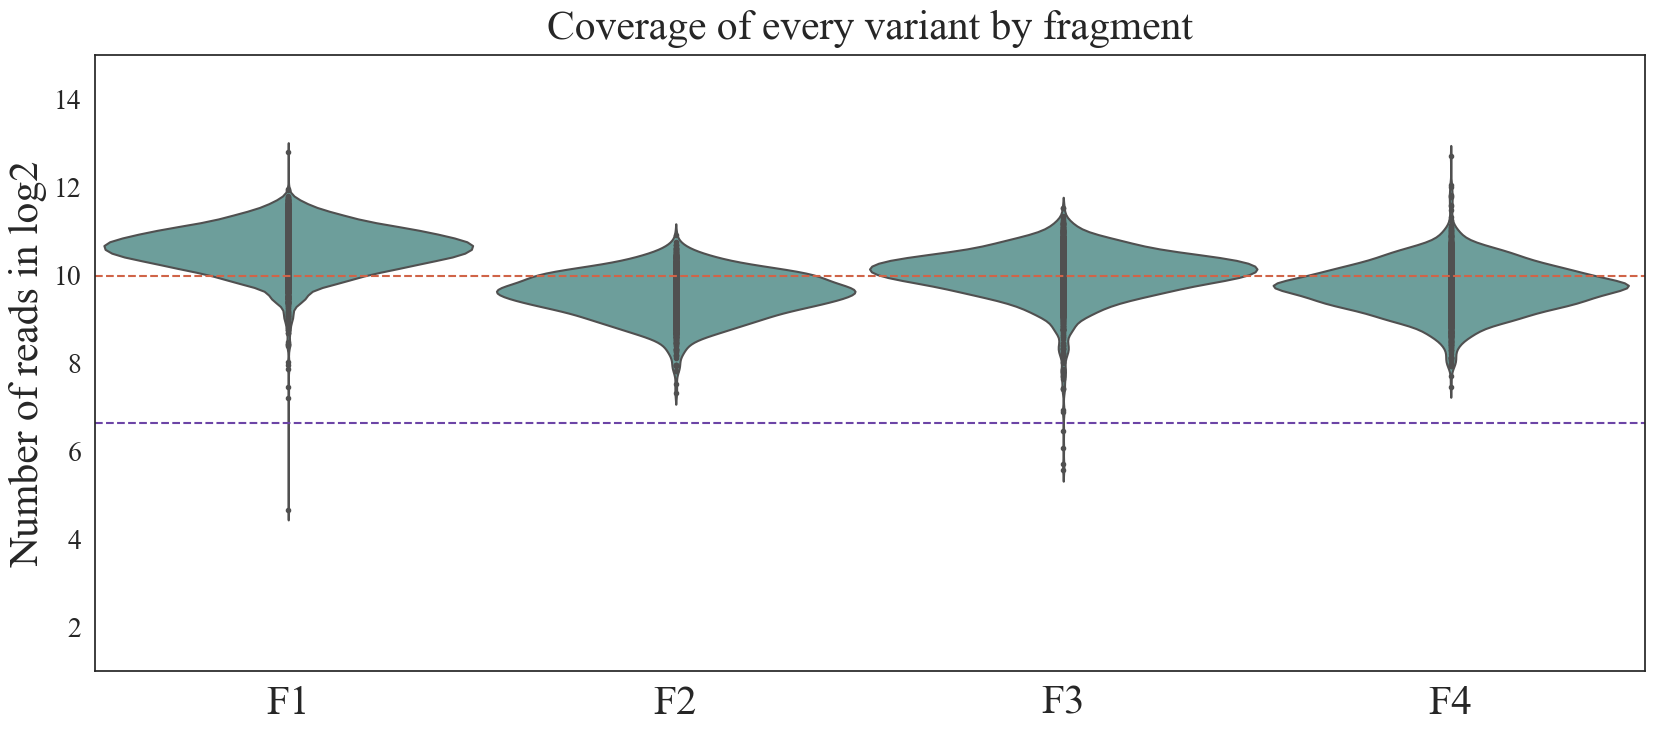

In [18]:

sns.set_style("white")

row = 0
sns.set_theme(style="white", palette=None)
plt.figure(figsize=(20,8))
plt.rcParams['font.family'] = 'Times New Roman'
sns.violinplot(data = df_final_2, x = 'Fragment', y = 'nbr_reads_log',  inner = "point",width=1, color = "#65A6A2")
plt.ylabel("Number of reads in log2",fontsize = 30)
plt.xlabel("")
plt.tick_params(axis="x", labelsize=30) 
plt.tick_params(axis="y", labelsize=20) 

plt.axhline(9.97, color="#D06448", linestyle="--")
plt.axhline(6.64, color = "#6C44A6", linestyle="--")

plt.ylim(1, 15)

plt.title(f'Coverage of every variant by fragment',y=1.013, fontsize=30)

name = "./violin_plot_reads_all_log2_lanes_summed"+ ".csv"
plt.savefig(f'{name}.png', transparent=True, dpi=400, bbox_inches='tight')

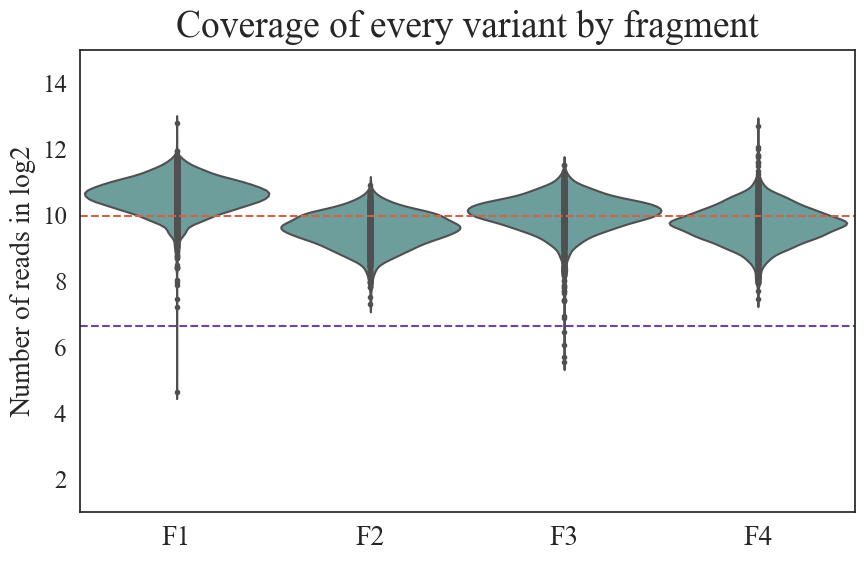

In [19]:

sns.set_style("white")

row = 0
sns.set_theme(style="white", palette=None)
plt.figure(figsize=(10,6))
plt.rcParams['font.family'] = 'Times New Roman'
sns.violinplot(data = df_final_2, x = 'Fragment', y = 'nbr_reads_log',  inner = "point",width=1, color = "#65A6A2")
plt.ylabel("Number of reads in log2",fontsize = 20)
plt.xlabel("")
plt.tick_params(axis="x", labelsize=20) 
plt.tick_params(axis="y", labelsize=18) 

plt.axhline(9.97, color="#D06448", linestyle="--")
plt.axhline(6.64, color = "#6C44A6", linestyle="--")

plt.ylim(1, 15)

plt.title(f'Coverage of every variant by fragment',y=1.01, fontsize=27)

name = "./violin_plot_reads_all_log2_lanes_summed"+ ".csv"
plt.savefig(f'{name}.png', transparent=True, dpi=400, bbox_inches='tight')

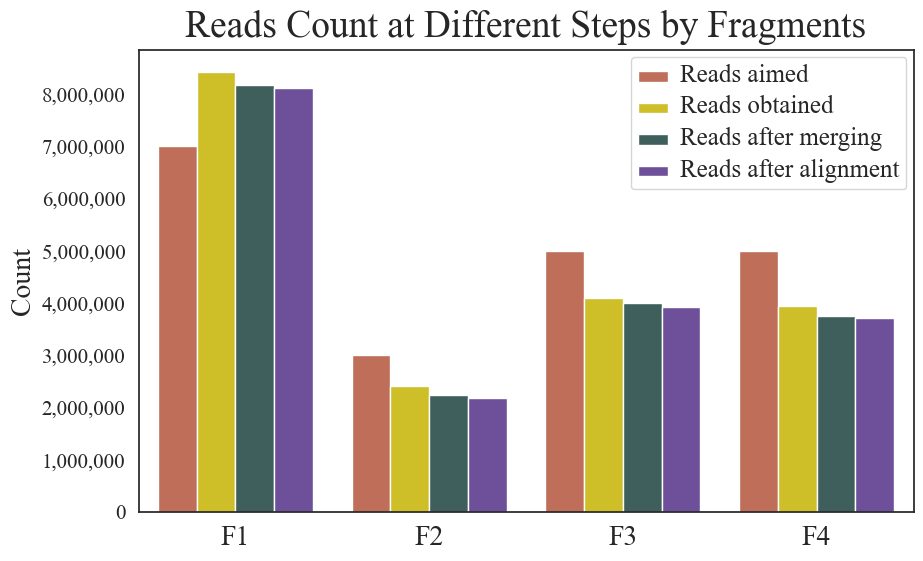

In [20]:
#melt df then use to do a barplot (would do a boxplot but i have only 1 value for each)

df = pd.DataFrame({
    'Fragments': ['F1', 'F2', 'F3', 'F4'],
    'Reads aimed': [7000000, 3000000, 5000000, 5000000],
    'Reads obtained': [8424407, 2403697, 4098340, 3942958],
    'Reads after merging': [8167115, 2236074, 3993975, 3757852],
    'Reads after alignment': [8112927, 2177920, 3930577, 3704032]
})

# Reshape the DataFrame using melt()
df_melted = df.melt(id_vars='Fragments', var_name='Reads', value_name='Count')

sns.set(font_scale=1, font="Times New Roman")
custom_palette = sns.blend_palette(["#CF6448","#E9D40D","#386461","#6C44A6"], n_colors=4)
# Create the bar plot
sns.set_style("white")
plt.rcParams['font.family'] = 'Times New Roman'
plt.figure(figsize=(10, 6))
g = sns.barplot(data=df_melted, x='Fragments', y='Count', hue='Reads',palette = custom_palette)
g.legend_.set_title(None)
for i in range(4):
    g.legend_.texts[i].set_fontsize(18)
plt.xlabel('')
plt.ylabel('Count', fontsize =20)
plt.yticks([0, 1000000,2000000,3000000, 4000000,5000000,6000000, 7000000, 8000000],fontsize=15)
plt.xticks(fontsize=20)
plt.gca().get_yaxis().set_major_formatter(mticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.title('Reads Count at Different Steps by Fragments', fontsize=27,y=1.01)

name = "barplot_nbr_reads_by_fragments_" + experiment + date + ".png"
plt.savefig(name, transparent=True, dpi=400, bbox_inches='tight')

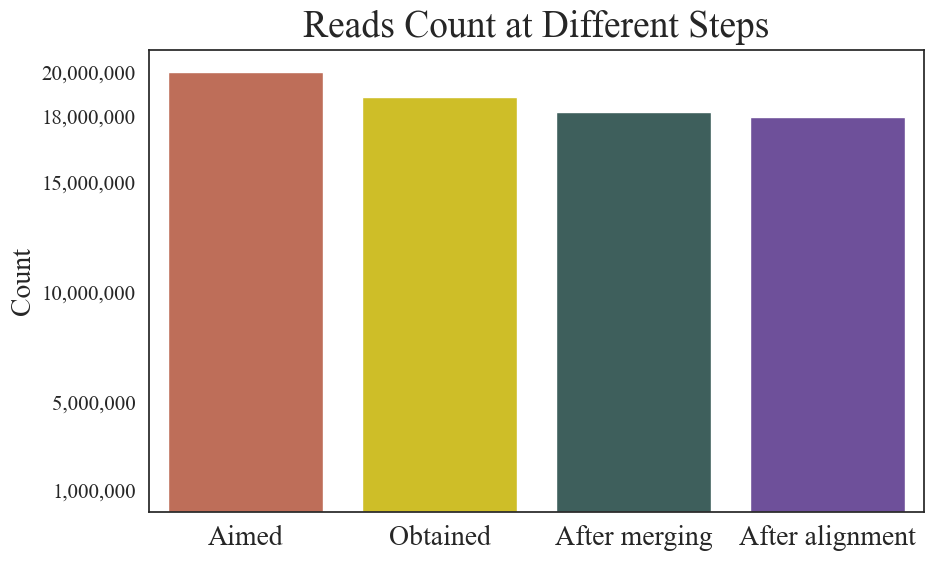

In [21]:
#melt df then use to do a barplot (would do a boxplot but i have only 1 value for each)

df = pd.DataFrame({
    'Fragments': ['F1', 'F2', 'F3', 'F4'],
    'Aimed': [7000000, 3000000, 5000000, 5000000],
    'Obtained': [8424407, 2403697, 4098340, 3942958],
    'After merging': [8167115, 2236074, 3993975, 3757852],
    'After alignment': [8112927, 2177920, 3930577, 3704032]
})

colu = ['Aimed','Obtained','After merging','After alignment']

df_reads_sum = pd.DataFrame(df[colu].sum())

df_reads_sum = df_reads_sum.reset_index()
custom_palette = sns.blend_palette(["#CF6448","#E9D40D","#386461","#6C44A6"], n_colors=4)
# Create the bar plot
sns.set_style("white")
plt.rcParams['font.family'] = 'Times New Roman'

plt.figure(figsize=(10, 6))
sns.barplot(data=df_reads_sum, x = "index", y = 0, palette = custom_palette)
plt.xlabel('', fontsize =17)
plt.ylabel('Count', fontsize =20)
plt.yticks([1000000,5000000, 10000000, 15000000,18000000, 20000000],fontsize=15)
plt.xticks(fontsize=20)

plt.title('Reads Count at Different Steps', fontsize=27, y=1.01)
plt.gca().get_yaxis().set_major_formatter(mticker.FuncFormatter(lambda x, p: format(int(x), ',')))

name = "barplot_nbr_reads_steps_" + experiment + date + ".png"
plt.savefig(name, transparent=True, dpi=400, bbox_inches='tight')

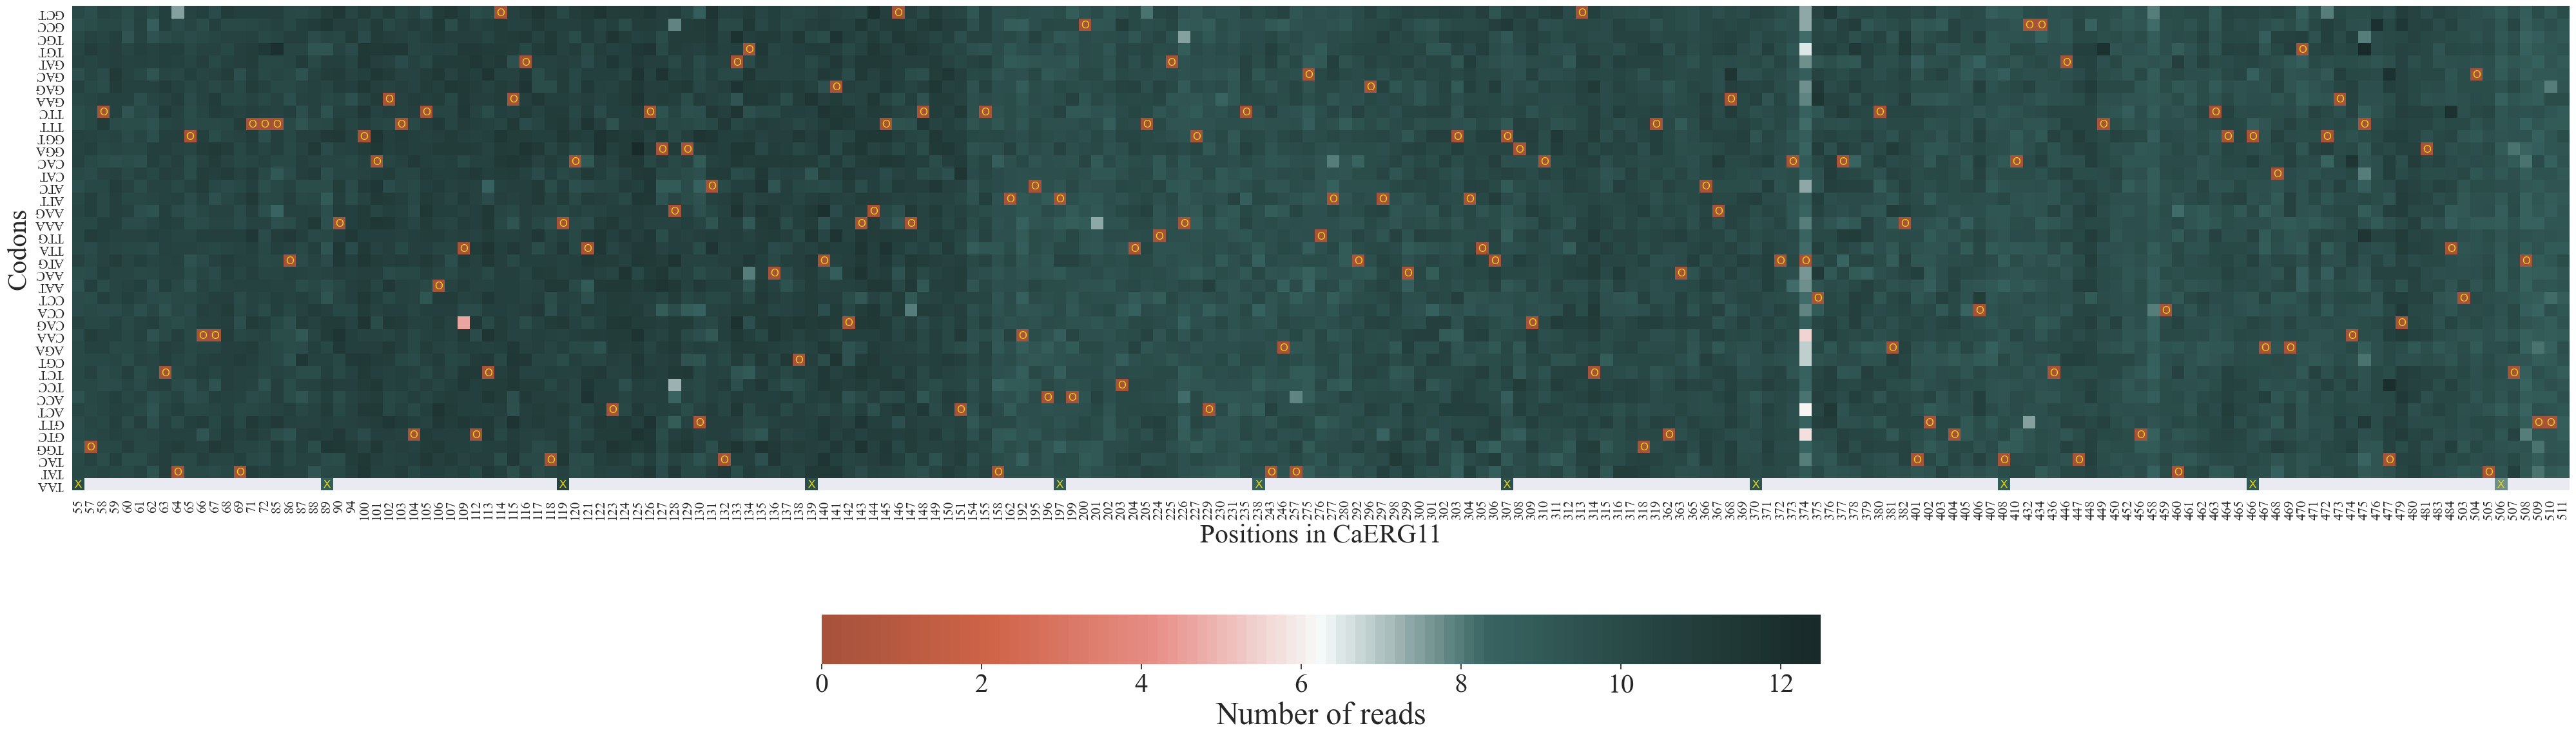

In [23]:
##get a heatmap of the number of reads in log
plt.rcParams['font.family'] = 'Times New Roman'

heat = pd.pivot_table(df_final, index='codon', columns='position', values='nbr_reads_log')
heat = heat.reindex(index = ["GCT","GCC","TGC","TGT","GAT","GAC","GAG","GAA",
"TTC","TTT","GGT","GGA","CAC","CAT","ATC","ATT","AAG","AAA","TTG","TTA","ATG","AAC","AAT","CCT","CCA","CAG","CAA",
"AGA","CGT","TCT","TCC","ACC","ACT","GTT","GTC","TGG","TAC","TAT","TAA"])

sns.set(font_scale=1, font="Times New Roman")

custom_palette = sns.blend_palette(["#A7523B","#CF6448","#E78E87","#F7FBFB","#386461","#274543","#182A29"], n_colors=101)

plt.subplots(figsize=(50,50))
sns.set(rc={'figure.facecolor':'white'})

ax = sns.heatmap(heat, xticklabels="auto", yticklabels=True, cmap = custom_palette,vmin=0, vmax=12.5,
                 robust = True,square=True, cbar_kws={"shrink": 0.4,"pad": 0.05,'label': 'Number of reads','ticks': [0, 2, 4,6,8,10,12],"orientation": "horizontal"})

cbar = ax.collections[0].colorbar


for label in cbar.ax.get_xticklabels():
    label.set_fontproperties("Times New Roman")

cbar.ax.yaxis.label.set_font("Times New Roman")
cbar.ax.xaxis.label.set_font("Times New Roman")

cbar.ax.xaxis.label.set_fontsize(35)
cbar.ax.tick_params(labelsize=30)

#annotate wt and stop codons
for i in range(heat.shape[0]):
    x = i
    for j in range(heat.shape[1]):
        y = j
        if wt.iloc[x, y] == "O" or wt.iloc[x, y] == "X":
            plt.text(y + 0.5, x + 0.5, wt.iloc[x, y], ha='center', va='center', fontsize=12, color='#E9D40D')

plt.tick_params(axis='both', labelsize=15)
plt.yticks(rotation = 180,fontsize=15)
#titre = "Coverage of every variants in CaERG11 library"
#plt.title(titre, fontsize =40, y=1.013)
plt.xlabel('Positions in CaERG11', fontsize = 30)
plt.ylabel('Codons', fontsize = 30)
name = "heatmap_nbr_reads_variants_log_vertical_" + experiment + date + ".png"
plt.savefig(name, transparent=True, dpi=400, bbox_inches='tight')